# Análisis de datos para plataforma de apuestas deportivas para la UEFA Champions League

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print('Setup completado')


Setup completado


## DATASET EQUIPOS

In [3]:
nombres_col_equipos = ["Equipo", "Escudo", "Pais", "Champions_W"]
df_equipos = pd.read_csv("data/equipos.csv", names=nombres_col_equipos, sep= ",")

df_equipos


,Equipo,Escudo,Pais,Champions_W
0,Ajax,ajax.png,Paises Bajos,14
1,Atalanta,atalanta.png,Italia,6
2,Atlético,atletico.png,España,11
3,Barcelona,barcelona.png,España,17
4,Bayern,bayern.png,Alemania,16
5,Benfica,benfica.png,Portugal,15
6,Besiktas,besiktas.png,Turquía,2
7,Chelsea,chelsea.png,Inglaterra,1
8,Club Brugge,club_brugge.png,Bélgica,26
9,Dortmund,dortmund.png,Alemania,27


In [4]:
print(f'Este dataset tiene {df_equipos.shape[0]} filas y {df_equipos.shape[1]} columnas.')

Este dataset tiene 32 filas y 4 columnas.


In [5]:
# Eliminar valores nulos
df_equipos_1 = df_equipos.dropna()

# Eliminar filas duplicadas
df_equipos_1 = df_equipos_1.drop_duplicates()

print( f'Se han eliminado {df_equipos.shape[0] - df_equipos_1.shape[0]} filas')

Se han eliminado 0 filas


In [6]:
# quitamos la columna de escudos porque no la vamos a usar
df_equipos_1 = df_equipos_1.drop(['Escudo'], axis=1)
df_equipos_1.head()

,Equipo,Pais,Champions_W
0,Ajax,Paises Bajos,14
1,Atalanta,Italia,6
2,Atlético,España,11
3,Barcelona,España,17
4,Bayern,Alemania,16


### Visualización

Equipos con más UEFA Champions Leagues

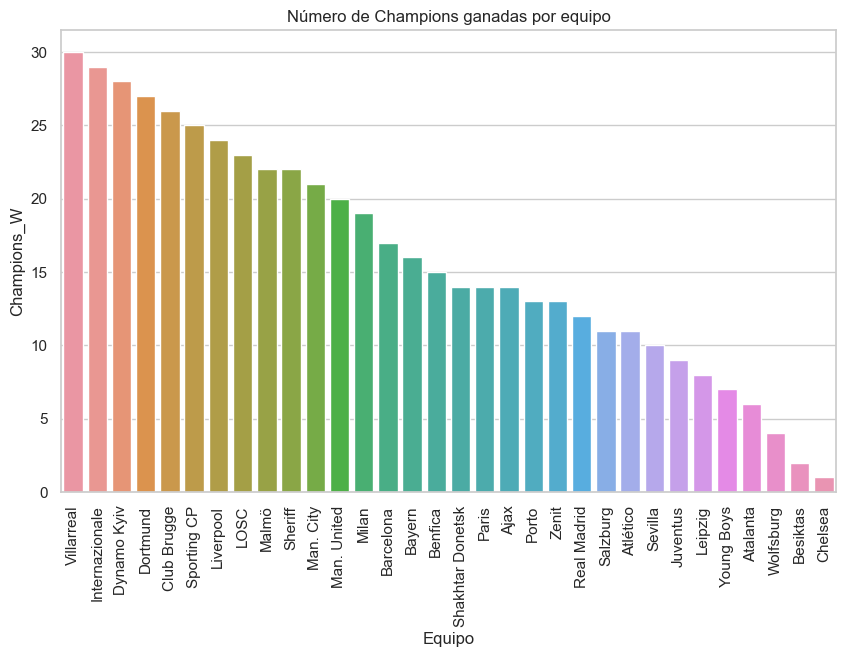

In [30]:
# ordenamos el dataframe por el número de champions
df_equipos_ordenado = df_equipos_1.sort_values(by='Champions_W', ascending=False)
# visualizar grafico barras x=equipos y=champions_w
plt.figure(figsize=(10, 6))
sns.barplot(data=df_equipos_ordenado, x='Equipo', y='Champions_W')
plt.xticks(rotation=90)
plt.title('Número de Champions ganadas por equipo')
plt.show()


Nos damos cuenta de que en el dataset es incoherente porque el Villareal no tiene 30 títulos de UEFA Champions League. Vamos a corregirlo. Según Wikipedia estos serían los datos de los equipos que han ganado alguna vez la UEFA Champions League:

In [39]:
import pandas as pd

data = {
    "Equipo": [
        "Real Madrid C. F.",
        "A. C. Milan",
        "F. C. Bayern",
        "Liverpool F. C.",
        "F. C. Barcelona",
        "A. F. C. Ajax",
        "F. C. Internazionale",
        "Manchester United F. C.",
        "Juventus F. C.",
        "S. L. Benfica",
        "Chelsea F. C.",
        "Nottingham Forest F. C.",
        "F. C. Porto",
        "Celtic F. C.",
        "Hamburger S. V.",
        "F. C. Steaua Bucureşti",
        "Olympique de Marsella",
        "B. V. Borussia",
        "Manchester City F. C.",
        "Feyenoord Rotterdam",
        "Aston Villa F. C.",
        "P. S. V. Eindhoven",
        "F. K. Estrella Roja"
    ],

    "Pais": [
        "España",
        "Italia",
        "Alemania",
        "Inglaterra",
        "España",
        "Países Bajos",
        "Italia",
        "Inglaterra",
        "Italia",
        "Portugal",
        "Inglaterra",
        "Inglaterra",
        "Portugal",
        "Escocia",
        "Alemania",
        "Rumanía",
        "Francia",
        "Alemania",
        "Inglaterra",
        "Países Bajos",
        "Inglaterra",
        "Países Bajos",
        "Serbia"
    ],

    "Num_Titulos": [
        14, 7, 6, 6, 5, 4, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
    ],
}

df_equipos_real = pd.DataFrame(data)

df_equipos_real


,Equipo,Pais,Num_Titulos
0,Real Madrid C. F.,España,14
1,A. C. Milan,Italia,7
2,F. C. Bayern,Alemania,6
3,Liverpool F. C.,Inglaterra,6
4,F. C. Barcelona,España,5
5,A. F. C. Ajax,Países Bajos,4
6,F. C. Internazionale,Italia,3
7,Manchester United F. C.,Inglaterra,3
8,Juventus F. C.,Italia,2
9,S. L. Benfica,Portugal,2


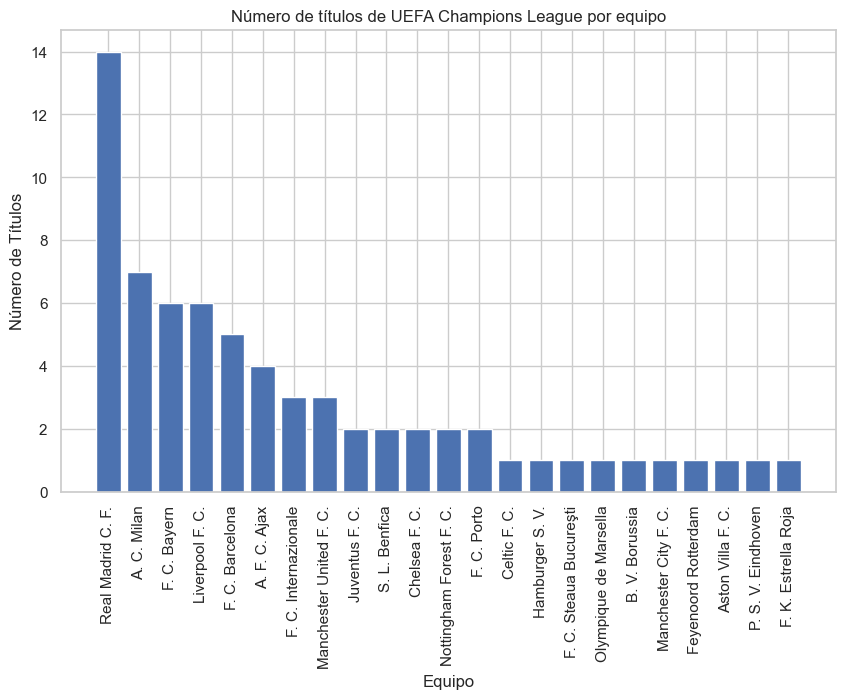

In [52]:
df_equipos_ordenado = df_equipos_real.sort_values(by='Num_Titulos', ascending=False)
# visualizar grafico barras x=equipos y=champions_w
plt.figure(figsize=(10, 6))
plt.bar(df_equipos_real["Equipo"], df_equipos_real["Num_Titulos"])
plt.xlabel("Equipo")
plt.ylabel("Número de Títulos")
plt.title('Número de títulos de UEFA Champions League por equipo')
plt.xticks(rotation=90)
plt.show()


In [65]:
print('Equipos que más títulos de UEFA Champions League han ganado:')
df_equipos_ordenado.head(5)

Equipos que más títulos de UEFA Champions League han ganado:


,Equipo,Pais,Num_Titulos
0,Real Madrid C. F.,España,14
1,A. C. Milan,Italia,7
2,F. C. Bayern,Alemania,6
3,Liverpool F. C.,Inglaterra,6
4,F. C. Barcelona,España,5


Países de los que provienen los equipos

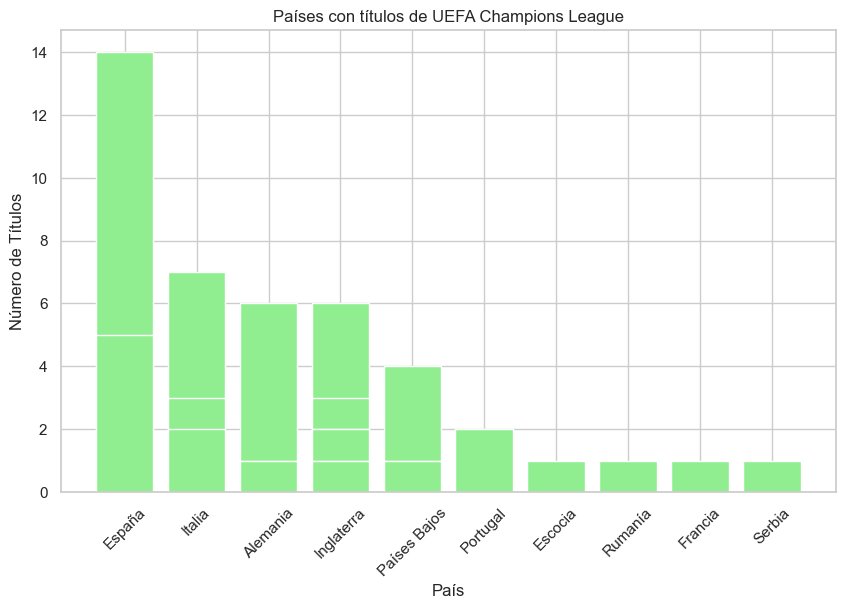

In [62]:
# Ordenar los países por número de títulos en orden descendente
df_equipos_paises = df_equipos_real.sort_values(by="Num_Titulos", ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_equipos_paises["Pais"], df_equipos_paises["Num_Titulos"], color="lightgreen")
plt.xlabel("País")
plt.ylabel("Número de Títulos")
plt.title("Países con títulos de UEFA Champions League")
plt.xticks(rotation=45)
plt.show()

España es el país que más veces ha ganado la UEFA Champions League.

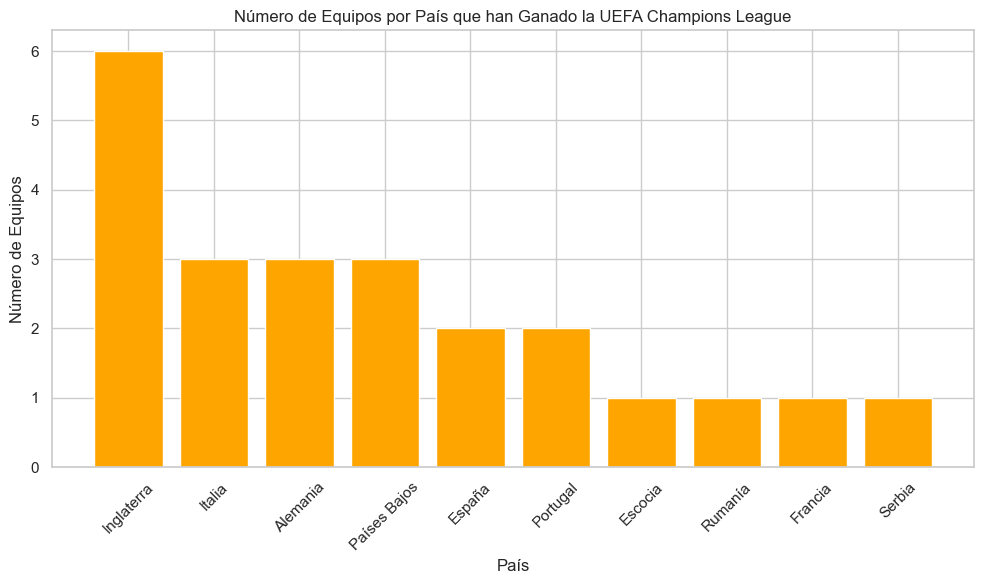

In [63]:
# Contar el número de equipos por país que han ganado la UEFA Champions League
equipos_por_pais = df_equipos_real["Pais"].value_counts().reset_index()
equipos_por_pais.columns = ["Pais", "Num_Equipos"]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(equipos_por_pais["Pais"], equipos_por_pais["Num_Equipos"], color="orange")
plt.xlabel("País")
plt.ylabel("Número de Equipos")
plt.title("Número de Equipos por País que han Ganado la UEFA Champions League")
plt.xticks(rotation=45)
plt.tight_layout()


El país con más equipos que en algún momento han ganado la UEFA Champions League es Inglaterra, con 6 equipos. Le siguen Italia, Alemania y Países Bajos con 3 equipos cada uno. España tiene sólo 2 equipos que han ganado la UEFA Champions League, sin embargo, son los equipos que más veces la han ganado.